Title & Introduction

# 🍷 Wine Quality Dataset - Data Cleaning and Exploratory Data Analysis (EDA)

This report presents the data cleaning and statistical analysis of a red wine quality dataset.
The dataset was downloaded from a local CSV file and includes physicochemical properties and quality ratings of wine samples.

### 📌 Objectives:
- Clean and preprocess the dataset
- Handle missing and incorrect data
- Perform statistical summary
- Visualize distributions and relationships between features


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Load data
file_path = r"c:\Users\divya\Downloads\winequality-red-dirty.csv"
df = pd.read_csv(file_path)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 🔍 Data Overview

We'll now take a look at the basic structure of the dataset: number of rows/columns, column names, and missing values.


In [3]:
##Overview & Missing Values
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())


Shape of dataset: (1599, 12)

Column names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Data Types:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Missing values per column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## 🧹 Data Cleaning

- Convert incorrect data types (e.g., object to numeric)
- Fill missing values using the mean
- Make all values positive (where appropriate)
- Save the cleaned data


In [4]:
##Clean the Data
# Make a copy
x = df.copy()

# Convert 'citric acid' to numeric
x['citric acid'] = pd.to_numeric(x['citric acid'], errors='coerce')

# Fill missing values with column means
for col in ['pH', 'alcohol', 'chlorides', 'citric acid']:
    if x[col].isnull().sum() > 0:
        x[col].fillna(x[col].mean().round(3), inplace=True)

# Ensure all numeric values are positive (if logical)
x = x.abs()

# Save cleaned data
output_path = r"c:\Users\divya\Desktop\data_cleaning\cleaned_file.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
x.to_csv(output_path, index=False)

print("✅ Cleaned data saved to:", output_path)


✅ Cleaned data saved to: c:\Users\divya\Desktop\data_cleaning\cleaned_file.csv


## 📊 Statistical Summary

Now, let's explore:
- Descriptive statistics
- Skewness and kurtosis
- Correlation matrix


Skewness:
 fixed acidity           0.983
volatile acidity        0.672
citric acid             0.315
residual sugar          4.481
chlorides               5.682
free sulfur dioxide     1.251
total sulfur dioxide    1.516
density                 0.071
pH                     -4.573
sulphates               2.429
alcohol                 0.865
quality                 0.218
dtype: float64

Kurtosis:
 fixed acidity            1.132
volatile acidity         1.226
citric acid             -0.785
residual sugar          27.992
chlorides               41.740
free sulfur dioxide      2.024
total sulfur dioxide     3.810
density                  0.934
pH                      52.696
sulphates               11.720
alcohol                  0.238
quality                  0.297
dtype: float64


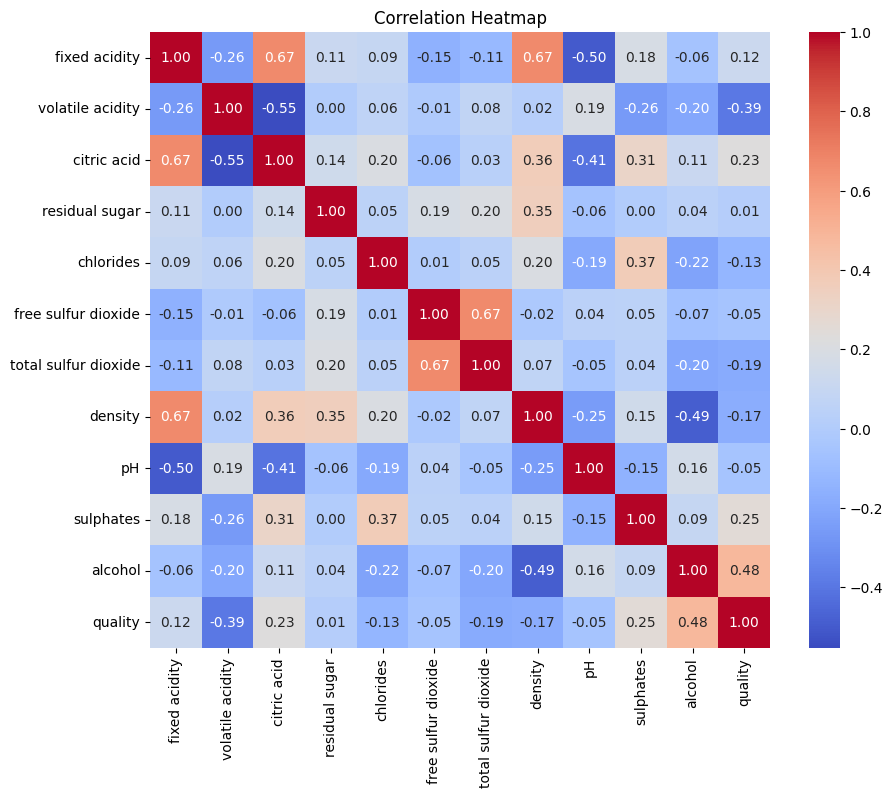

In [5]:
x.describe().round(3)
print("Skewness:\n", x.skew(numeric_only=True).round(3))
print("\nKurtosis:\n", x.kurt(numeric_only=True).round(3))
plt.figure(figsize=(10, 8))
sns.heatmap(x.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## 📊 Visualizations

We now visualize:
- Distributions using histograms
- Outliers using boxplots
- Relationships using pairplots


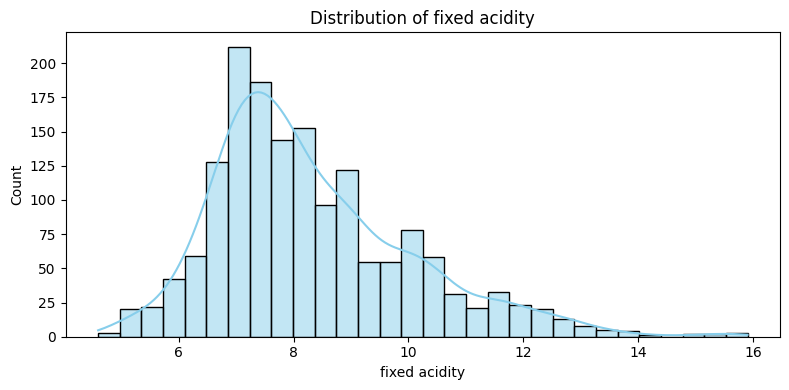

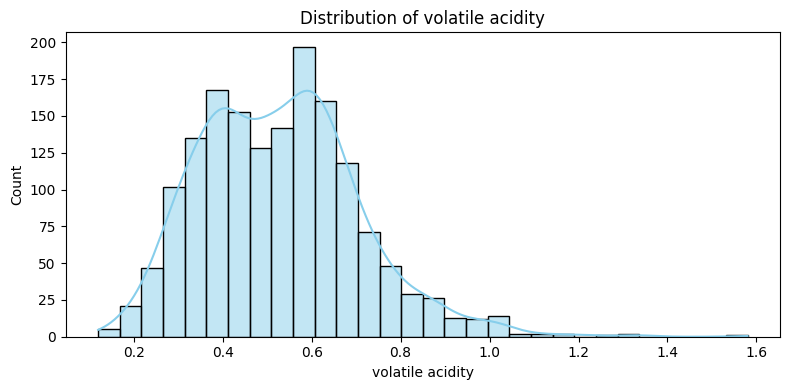

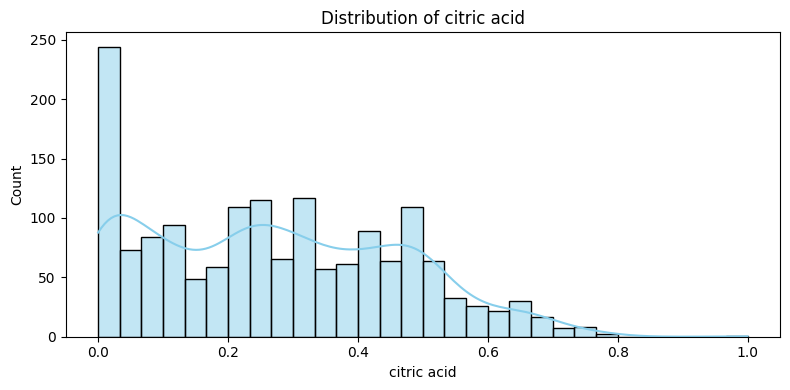

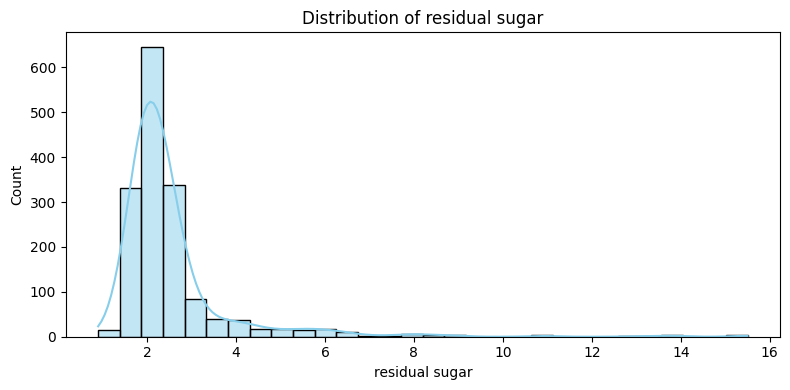

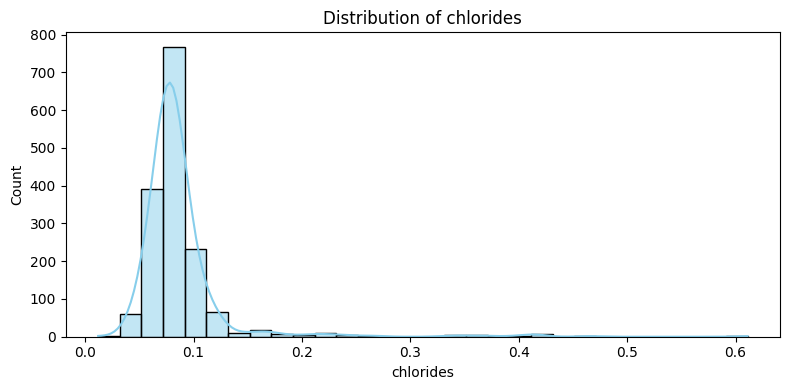

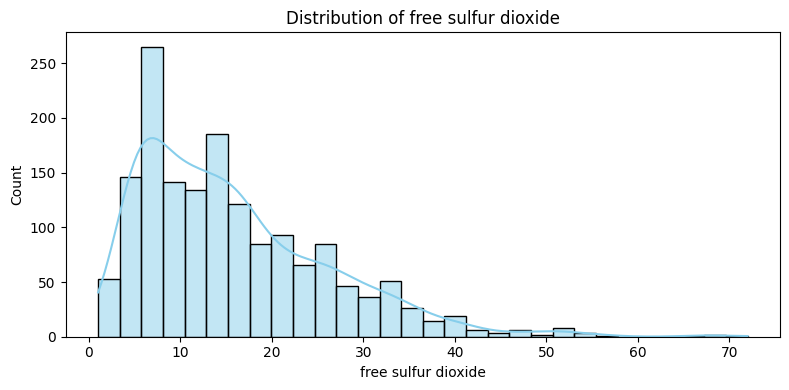

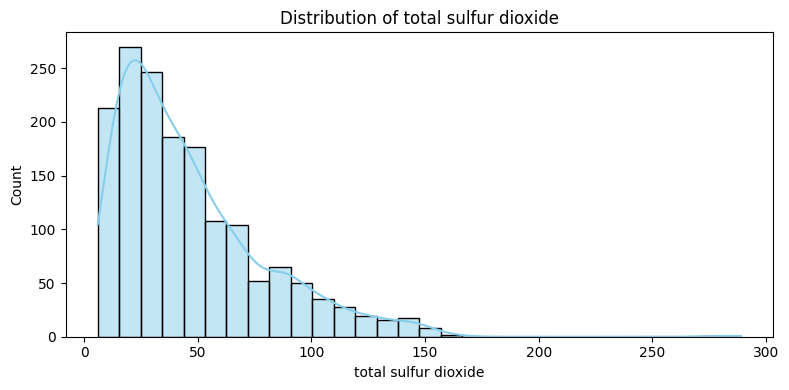

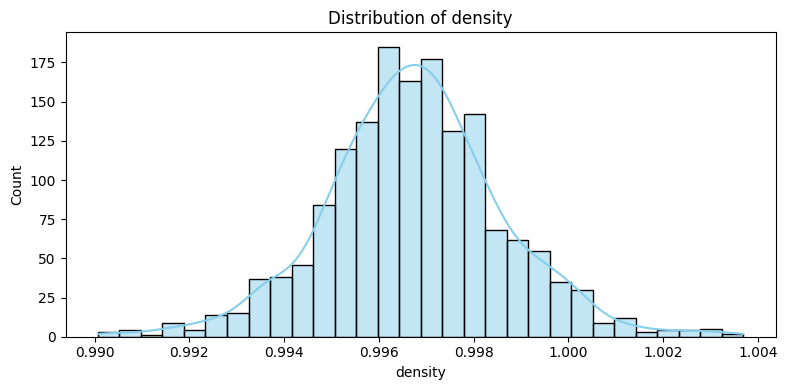

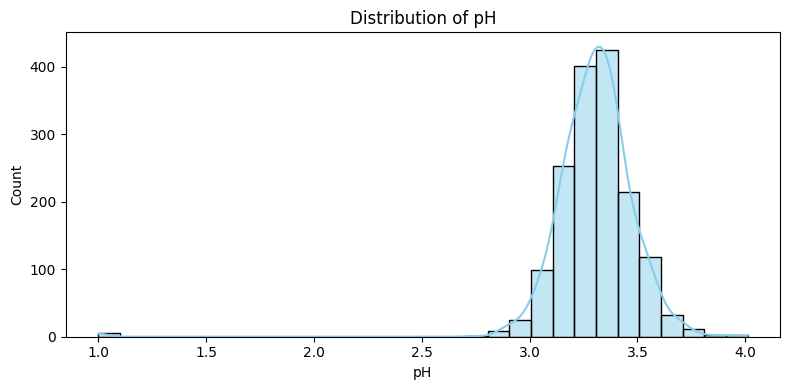

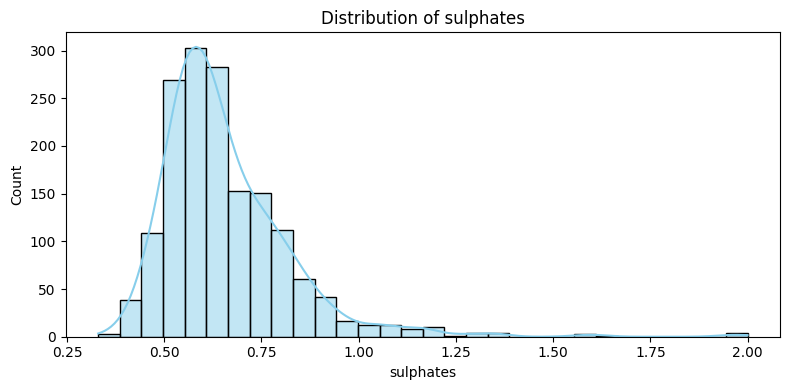

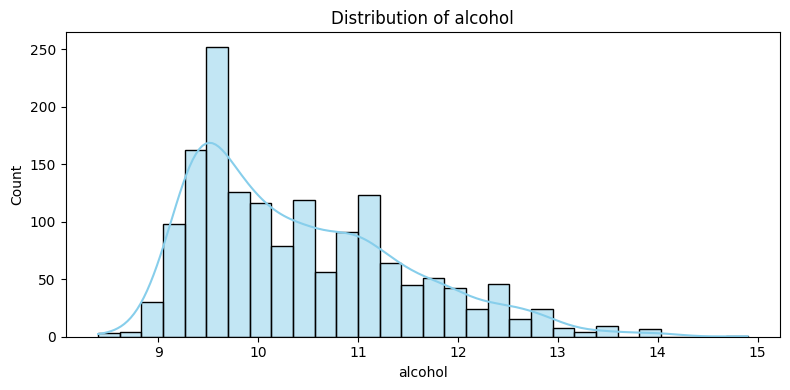

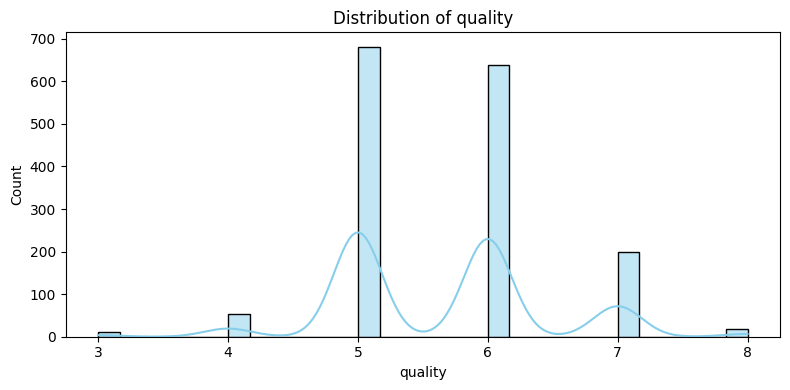

In [6]:
for col in x.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(x[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


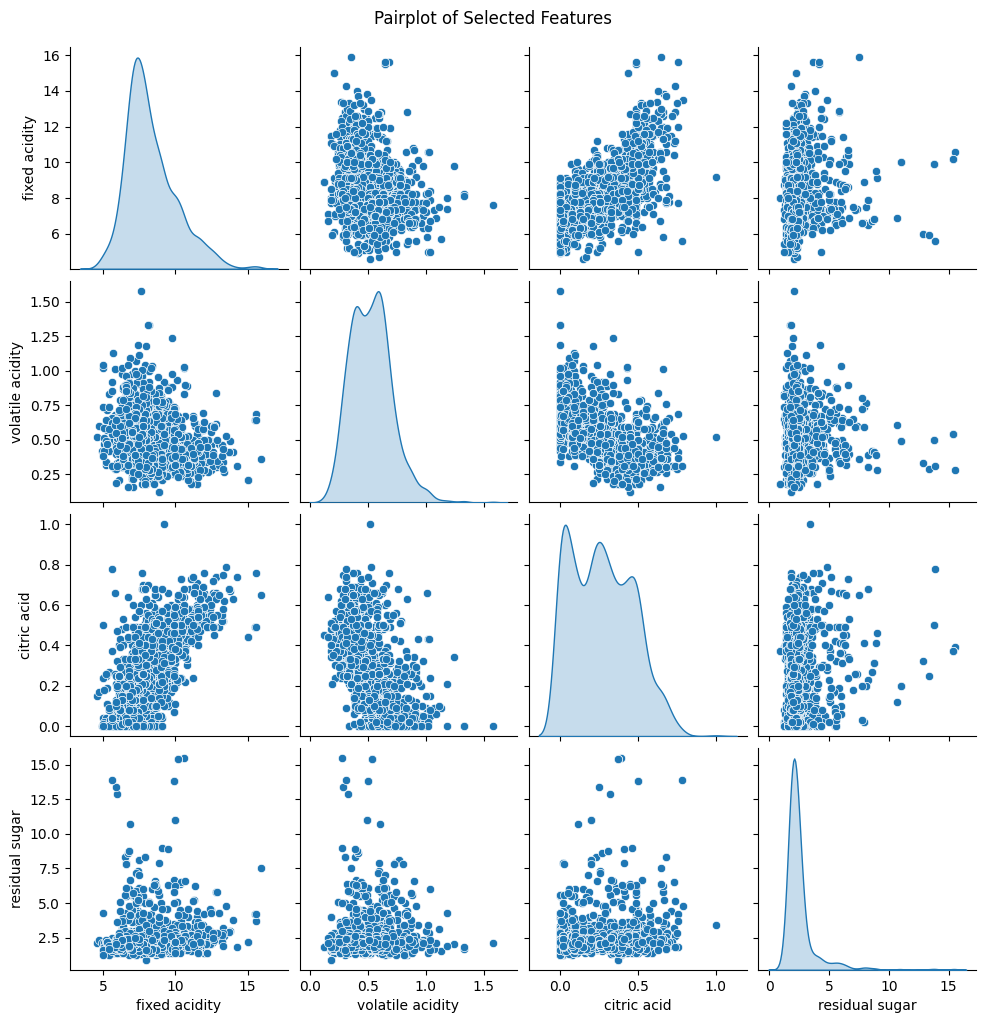

In [7]:
sns.pairplot(x[x.columns[:4]], diag_kind='kde')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


## ✅ Conclusion

- The dataset was cleaned by handling missing and invalid values.
- Statistical metrics such as mean, standard deviation, skewness, and correlation were analyzed.
- Visualizations helped us understand distributions and detect outliers.
- We are now ready to move into modeling or deeper analysis.

**Next Steps:** Feature selection, predictive modeling, clustering, etc.
